# Exercise Practice 1 - Structured Dataset



---

---





## Exploratory Data Analysis (EDA)
Exploratory Data Analysis mengacu pada proses kritis melakukan penyelidikan awal pada data untuk menemukan pola, untuk menemukan anomali, untuk menguji hipotesis (statistik inferentif) dan untuk memeriksa asumsi dengan bantuan statistik deskriptif dan representasi grafis. [source](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)
- Matplotlib
- Seaborn
- Pandas
- Other Plotting Library

In [5]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import Normalizer, OneHotEncoder, StandardScaler,MinMaxScaler


### Exploring The Data

In [8]:
df = pd.read_csv('/content/drive/MyDrive/UTS/DATA_2/Mental.data')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = df[~df.duplicated()]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 98
Data columns (total 1 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Sex;Age;Course;Year;CGPA;Marital_status;Depression;Anxiety;Panic_attack;Seek_specialist_treatment  21 non-null     object
dtypes: object(1)
memory usage: 336.0+ bytes


In [11]:
df.nunique()

Sex;Age;Course;Year;CGPA;Marital_status;Depression;Anxiety;Panic_attack;Seek_specialist_treatment    21
dtype: int64

### Describe The Data

In [12]:
df.describe()

,Sex;Age;Course;Year;CGPA;Marital_status;Depression;Anxiety;Panic_attack;Seek_specialist_treatment
count,21
unique,21
top,Female;18;Engineering;4;3.50;0;0;0;0;0
freq,1


In [13]:
df

,Sex;Age;Course;Year;CGPA;Marital_status;Depression;Anxiety;Panic_attack;Seek_specialist_treatment
0,Female;18;Engineering;4;3.50;0;0;0;0;0
1,Female;24;Communication ;2;3.50;1;1;1;1;0
2,Female;24;Diploma Nursing;2;3.50;0;0;0;0;0
3,Female;19;Engineering;1;3.00;0;1;1;0;0
4,Female;19;Pendidikan Islam ;2;3.00;0;0;0;0;0
5,Male;23;Radiography;1;3.00;0;0;0;0;0
6,Female;18;psychology;1;3.50;0;1;1;0;1
7,Female;19;Fiqh fatwa ;3;3.00;0;0;0;0;0
8,Female;18;psychology;1;3.50;0;1;1;1;0
9,Male;24;BIT;1;3.00;0;0;1;0;0


## Data collection

In [14]:
import numpy as np
import pandas as pd

datasets_1 = np.genfromtxt('/content/drive/MyDrive/UTS/DATA_2/Mental.data', delimiter=';', dtype=str)
datasets_2 = np.genfromtxt('/content/drive/MyDrive/UTS/DATA_2/Mental.test', delimiter=';', dtype=str, autostrip=True)

datasets_2 = np.char.strip(datasets_2, '.')

feature_and_labels_names = ["Sex", "Age", "Course", "Year", "CGPA", "Marital_status", "Depression", "Anxiety",
                            "Panic_attack", "Seek_specialist_treatment"]

alldata = np.concatenate((datasets_1, datasets_2), axis=0)

df = pd.DataFrame(alldata, columns=feature_and_labels_names)


In [15]:
from numpy import unique
for i in range(df.shape[1]):
    if len(np.unique(df.iloc[:, i])) <= 1:
        print(i)
    else:
        print(i, len(np.unique(df.iloc[:, i])))


0 4
1 10
2 50
3 6
4 9
5 4
6 4
7 4
8 4
9 4


In [16]:
print(df.shape)
for a in feature_and_labels_names:
    df = df[df[a].str.contains('\?') == False]

print(df.shape)
df.drop_duplicates()
df.dropna()
df.isnull().sum()
print(df.shape)


(180, 10)
(180, 10)
(180, 10)


['Year' '1' '2' '3' '4' '']
1      1
2      2
3      1
4      3
5      4
      ..
175    3
176    1
177    1
178    2
179    3
Name: Year, Length: 118, dtype: int64


<ipython-input-17-1882abfc2edb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(int)


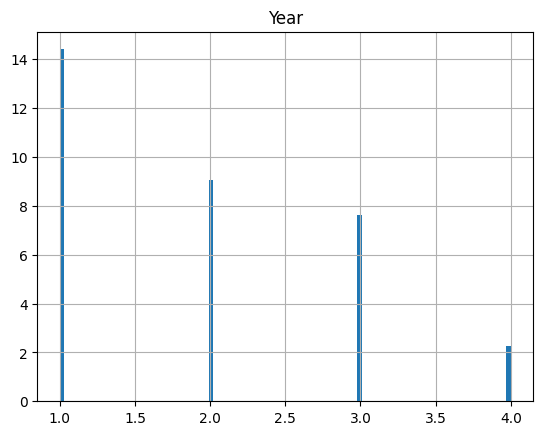

In [17]:
print(df['Year'].unique())

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

df = df.dropna(subset=['Year'])

df['Year'] = df['Year'].astype(int)

print(df['Year'])


ax = df.hist(column=['Year'], density=True, bins=100)


Removing outliers

In [18]:
np.random.seed(5)
data = df.to_numpy()
np.random.shuffle(data)
y = data[:,-1]
data =np.delete(data,[5],axis = 1)

 Feature selection is done in this step that Education-num is deleted for the repetition.

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

# Assuming 'data' and 'y' are your NumPy arrays

categorical_features = [0, 1, 3, 4, 5, 6, 7, 8]  # Remove index 10 from this list
categorical_names = {}

for feature in categorical_features:
    le = LabelEncoder()
    le.fit(data[:, feature])
    data[:, feature] = le.transform(data[:, feature])
    categorical_names[feature] = le.classes_

# Assuming you want to remove the last column (index 10)
# Check the number of columns before deletion
print("Number of columns before deletion:", data.shape[1])

# Delete the last column
data = np.delete(data, 5, axis=1)

# Check the number of columns after deletion
print("Number of columns after deletion:", data.shape[1])

# Define the transformer
t = [('cat', OneHotEncoder(), [0, 1, 3, 4, 5, 6, 7, 8]), ('num', MinMaxScaler(), [2, 9, 10, 11])]

# Create the ColumnTransformer
transformer = ColumnTransformer(transformers=t)

# Use LabelEncoder for target variable 'y'
le = LabelEncoder()
y = le.fit_transform(y)
class_names = le.classes_

data = data.astype(str)

data_1 = data[0:3000]
y_1 = y[0:3000]


Number of columns before deletion: 9
Number of columns after deletion: 8


In [20]:
df

,Sex,Age,Course,Year,CGPA,Marital_status,Depression,Anxiety,Panic_attack,Seek_specialist_treatment
1,Female,18,Engineering,1,3.00,0,1,0,1,0
2,Male,21,Islamic education,2,3.00,0,0,1,0,0
3,Male,19,BIT,1,3.00,0,1,1,1,0
4,Female,22,Laws,3,3.00,1,1,0,0,0
5,Male,23,Mathemathics,4,3.00,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
175,Female,24,Fiqh,3,2.00,0,0,0,1,0
176,Female,18,Islamic Education,1,3.50,0,0,0,0,0
177,Female,21,BCS,1,3.50,0,0,1,0,0
178,Male,18,Engineering,2,3.00,0,1,1,0,0


### Pie Diagram

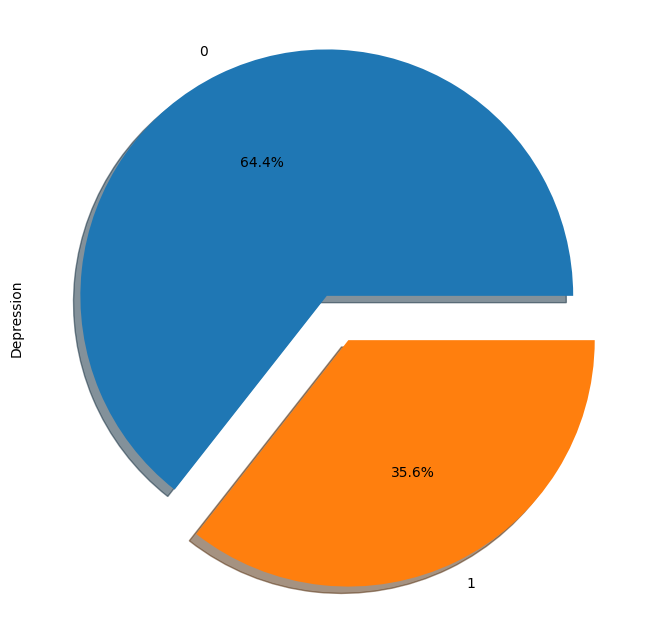

In [21]:
explode = [0.1] * len(df['Depression'].value_counts())
df['Depression'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', shadow=True, figsize=(10, 8))
plt.show()


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 1 to 179
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Sex                        118 non-null    object
 1   Age                        118 non-null    object
 2   Course                     118 non-null    object
 3   Year                       118 non-null    int64 
 4   CGPA                       118 non-null    object
 5   Marital_status             118 non-null    object
 6   Depression                 118 non-null    object
 7   Anxiety                    118 non-null    object
 8   Panic_attack               118 non-null    object
 9   Seek_specialist_treatment  118 non-null    object
dtypes: int64(1), object(9)
memory usage: 10.1+ KB


In [23]:
df['Age']=df['Age'].astype(int)
df['CGPA']=df['CGPA'].astype(str)
df['Depression']=df['Depression'].astype(int)
df['Anxiety']=df['Anxiety'].astype(int)
df['Panic_attack']=df['Panic_attack'].astype(int)
df['Seek_specialist_treatment']=df['Seek_specialist_treatment'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 1 to 179
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Sex                        118 non-null    object
 1   Age                        118 non-null    int64 
 2   Course                     118 non-null    object
 3   Year                       118 non-null    int64 
 4   CGPA                       118 non-null    object
 5   Marital_status             118 non-null    object
 6   Depression                 118 non-null    int64 
 7   Anxiety                    118 non-null    int64 
 8   Panic_attack               118 non-null    int64 
 9   Seek_specialist_treatment  118 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 10.1+ KB


### Boxplot
[Deskripsi Boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

![image.png](https://miro.medium.com/max/656/1*2c21SkzJMf3frPXPAR_gZA.png)


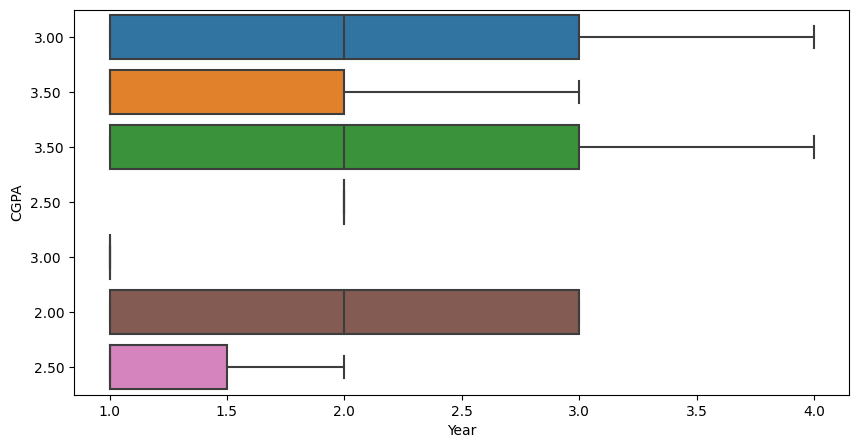

In [25]:
fig=plt.gcf()
fig.set_size_inches(10,5)

fig=sns.boxplot(x='Year', y='CGPA', data=df, linewidth=1.5)

### Countplot and Barplot (with subplot)

`Countplot digunakan untuk menghitung jumlah sample, sedangkan Barplot salah satunya digunakan untuk menghitung rate/prosentase dari sample.`

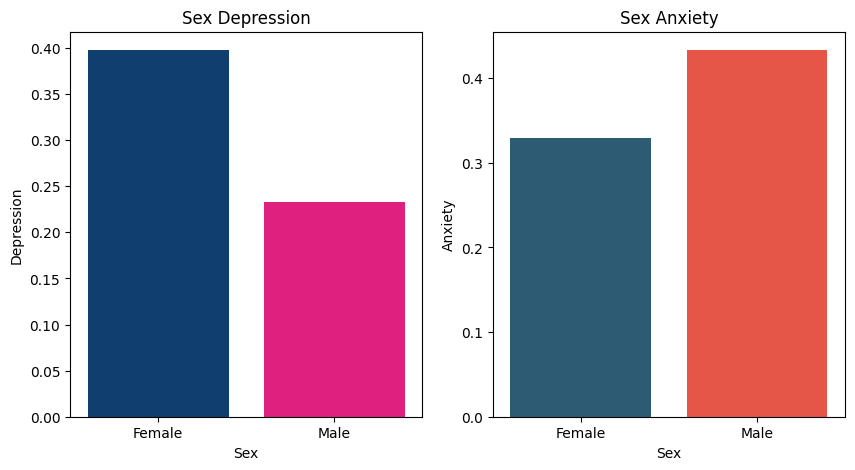

In [26]:
fig, axarr = plt.subplots(1, 2, figsize=(10,5))

axarr[0].set_title('Sex Depression')
axarr[1].set_title('Sex Anxiety')

a = sns.barplot(x='Sex', y='Depression', data=df, palette=('#003f7f','#ff007f'), errorbar=None, ax=axarr[0]).set_ylabel('Depression')
b = sns.barplot(x='Sex', y='Anxiety', data=df, palette=('#215f7f','#ff412f'), errorbar=None, ax=axarr[1]).set_ylabel('Anxiety')


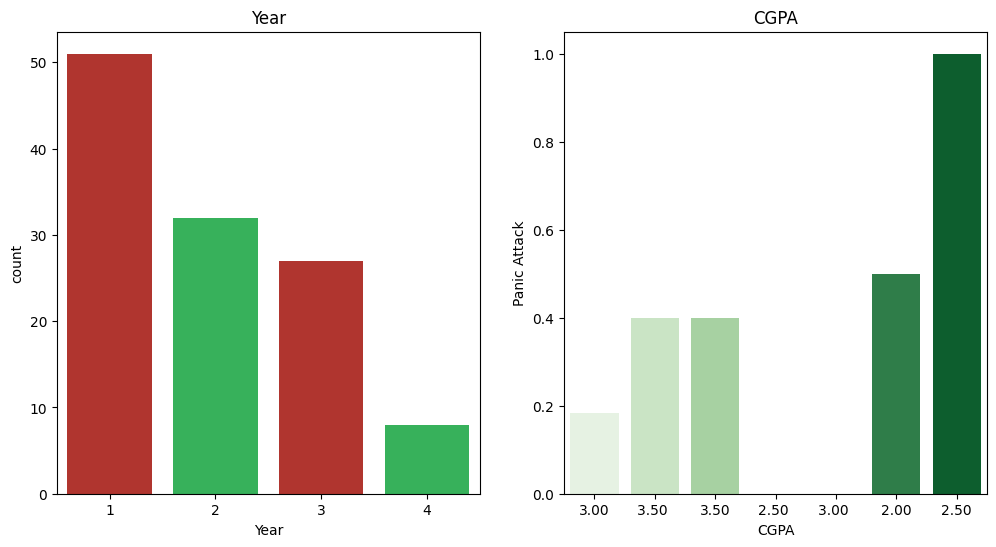

In [30]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(x='Year', data=df, palette=('#C52219', '#23C552'), ax=axarr[0]).set_title('Year')
ax=axarr[1].set_title('CGPA')
b = sns.barplot(x='CGPA', y='Panic_attack', data=df, palette="Greens", errorbar=None, ax=axarr[1]).set_ylabel('Panic Attack')

## Methods for Encoding [1](https://towardsdatascience.com/how-to-encode-categorical-data-d44dde313131) & [2](https://towardsdatascience.com/5-categorical-encoding-tricks-you-need-to-know-today-as-a-data-scientist-73cf75595298) Before Modeling


- **Label Encoding** adalah pengubahan label menjadi bentuk numerik untuk mengubahnya menjadi bentuk yang dapat dibaca mesin. Algoritma pembelajaran mesin kemudian dapat memutuskan dengan cara yang lebih baik tentang bagaimana label tersebut harus dioperasikan.
- **One Hot Encoding** adalah proses yang dikenal sebagai pengkodean variabel kategori menjadi variabel dummy. Metode pengolahan data ini mengubah kolom kategorikal biner (yes / no, male / female,…) menjadi vektor biner 0/1 dimana 0 menunjukkan tidak adanya baris yang termasuk dalam kategori tersebut. Metode ini bisa rumit jika digunakan untuk variabel multidimensi non-biner yang akan menghasilkan penambahan kolom yang tidak berguna. Misalnya, jika kita memiliki kolom yang mewakili x warna, satu pengkodean panas akan menghasilkan x kolom tambahan (warna_hijau, warna_biru,…).
- dll

In [31]:
dataset = df.copy()
dataset.head()

,Sex,Age,Course,Year,CGPA,Marital_status,Depression,Anxiety,Panic_attack,Seek_specialist_treatment
1,Female,18,Engineering,1,3.00,0,1,0,1,0
2,Male,21,Islamic education,2,3.00,0,0,1,0,0
3,Male,19,BIT,1,3.00,0,1,1,1,0
4,Female,22,Laws,3,3.00,1,1,0,0,0
5,Male,23,Mathemathics,4,3.00,0,0,0,0,0


In [32]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for c in dataset.columns[1:]:
    if(dataset[c].dtype=='object'):
        dataset[c] = encoder.fit_transform(dataset[c])
    else:
        dataset[c] = dataset[c]

dataset.head()

,Sex,Age,Course,Year,CGPA,Marital_status,Depression,Anxiety,Panic_attack,Seek_specialist_treatment
1,Female,18,17,1,3,0,1,0,1,0
2,Male,21,25,2,3,0,0,1,0,0
3,Male,19,4,1,3,0,1,1,1,0
4,Female,22,33,3,3,1,1,0,0,0
5,Male,23,37,4,3,0,0,0,0,0


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 1 to 179
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Sex                        118 non-null    object
 1   Age                        118 non-null    int64 
 2   Course                     118 non-null    int64 
 3   Year                       118 non-null    int64 
 4   CGPA                       118 non-null    int64 
 5   Marital_status             118 non-null    int64 
 6   Depression                 118 non-null    int64 
 7   Anxiety                    118 non-null    int64 
 8   Panic_attack               118 non-null    int64 
 9   Seek_specialist_treatment  118 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 10.1+ KB
